In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import pylab as py
from scipy.stats import skew

In [4]:
df = pd.read_csv('dataset/final_df.csv', index_col='Unnamed: 0')

# Získavanie priorov

1     9.339980
2    12.336734
3    16.320813
4    33.941958
5    28.060515
Name: Seat comfort, dtype: float64

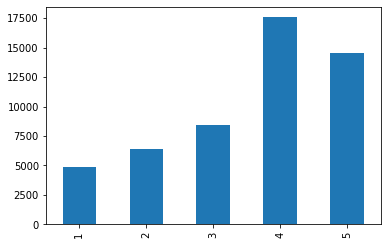

In [24]:
long_flights = df.loc[(df['Flight Distance'] > 843)]
long_flights_discomfort = long_flights['Seat comfort']

long_flights_discomfort.value_counts().sort_index().plot(kind='bar')

discomfort = long_flights_discomfort.value_counts().sort_index()
discomfort / sum(discomfort.values.tolist()) * 100

In [21]:
long_flights_discomfort = df.loc[(df['Flight Distance'] > 843) & (df['Seat comfort'] <= 3), 'satisfaction']
long_flights_comfort = df.loc[(df['Flight Distance'] > 843) & (df['Seat comfort'] > 3), 'satisfaction']

neutral or dissatisfied    75.577138
satisfied                  24.422862
Name: satisfaction, dtype: float64

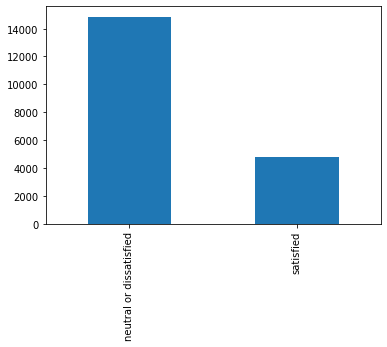

In [22]:
long_flights_discomfort.value_counts().sort_index().plot(kind='bar')

discomfort = long_flights_discomfort.value_counts().sort_index()
discomfort / sum(discomfort.values.tolist()) * 100

neutral or dissatisfied    28.454347
satisfied                  71.545653
Name: satisfaction, dtype: float64

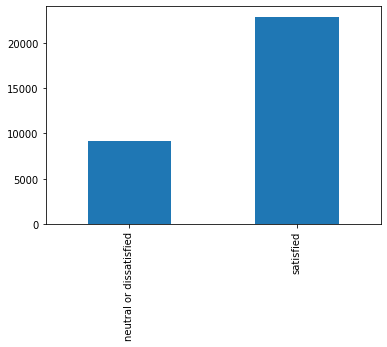

In [23]:
long_flights_comfort.value_counts().sort_index().plot(kind='bar')

comfort = long_flights_comfort.value_counts().sort_index()
comfort / sum(comfort.values.tolist()) * 100

![bajes 1](img/bajes2.png)

# Získavanie priorov

Loyal Customer       81.72481
disloyal Customer    18.27519
Name: Customer Type, dtype: float64

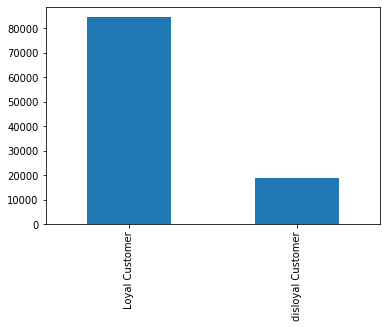

In [8]:
customer_type = df['Customer Type']

customer_type.value_counts().sort_index().plot(kind='bar')

c_type = customer_type.value_counts().sort_index()
c_type / sum(c_type.values.tolist()) * 100

0     0.003544
1     7.092911
2    11.616782
3    19.004985
4    35.955919
5    26.325860
Name: Inflight service, dtype: float64

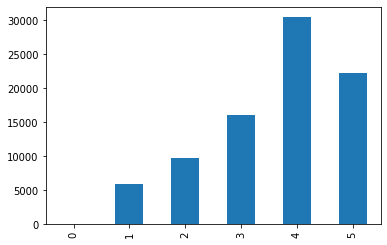

In [10]:
loyal_customer = df.loc[(df['Customer Type'] == 'Loyal Customer')]
loyal_customer_bad = loyal_customer['Inflight service']

loyal_customer_bad.value_counts().sort_index().plot(kind='bar')

loyal_bad = loyal_customer_bad.value_counts().sort_index()
loyal_bad / sum(loyal_bad.values.tolist()) * 100

1     5.588422
2     8.340376
3    21.851891
4    39.113670
5    25.105641
Name: Inflight service, dtype: float64

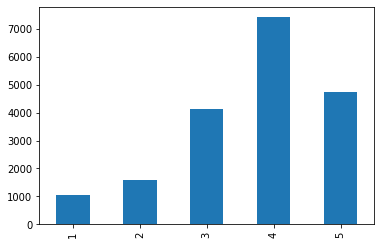

In [14]:
disloyal_customer = df.loc[(df['Customer Type'] == 'disloyal Customer')]
disloyal_customer_bad = disloyal_customer['Inflight service']

disloyal_customer_bad.value_counts().sort_index().plot(kind='bar')

disloyal_bad = disloyal_customer_bad.value_counts().sort_index()
disloyal_bad / sum(disloyal_bad.values.tolist()) * 100

In [15]:
loyal_customer = df.loc[(df['Customer Type'] == 'Loyal Customer') & (df['Inflight service'] <= 3), 'satisfaction']
disloyal_customer = df.loc[(df['Customer Type'] == 'disloyal Customer') & (df['Inflight service'] <= 3), 'satisfaction']

neutral or dissatisfied    69.996555
satisfied                  30.003445
Name: satisfaction, dtype: float64

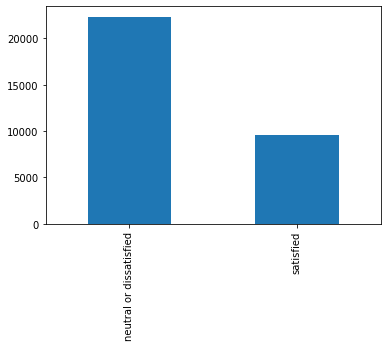

In [16]:
loyal_customer.value_counts().sort_index().plot(kind='bar')

loyal = loyal_customer.value_counts().sort_index()
loyal / sum(loyal.values.tolist()) * 100

neutral or dissatisfied    89.120165
satisfied                  10.879835
Name: satisfaction, dtype: float64

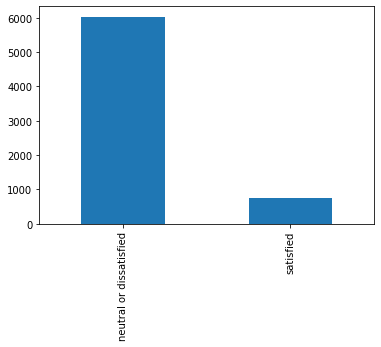

In [17]:
disloyal_customer.value_counts().sort_index().plot(kind='bar')

disloyal = disloyal_customer.value_counts().sort_index()
disloyal / sum(disloyal.values.tolist()) * 100

In [18]:
loyal_customer = df.loc[(df['Customer Type'] == 'Loyal Customer') & (df['Inflight service'] > 3), 'satisfaction']
disloyal_customer = df.loc[(df['Customer Type'] == 'disloyal Customer') & (df['Inflight service'] > 3), 'satisfaction']

neutral or dissatisfied    41.527433
satisfied                  58.472567
Name: satisfaction, dtype: float64

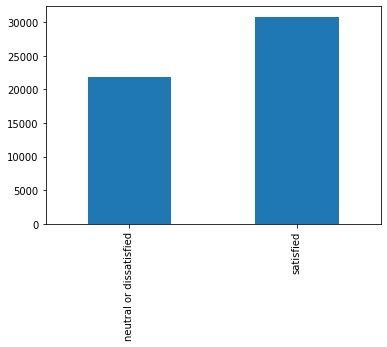

In [19]:
loyal_customer.value_counts().sort_index().plot(kind='bar')

loyal = loyal_customer.value_counts().sort_index()
loyal / sum(loyal.values.tolist()) * 100

neutral or dissatisfied    69.180786
satisfied                  30.819214
Name: satisfaction, dtype: float64

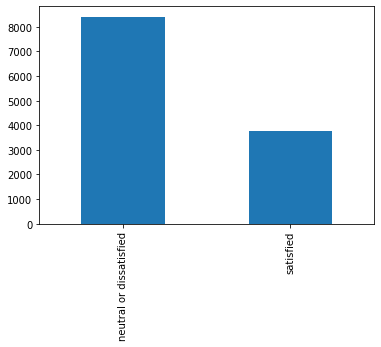

In [20]:
disloyal_customer.value_counts().sort_index().plot(kind='bar')

disloyal = disloyal_customer.value_counts().sort_index()
disloyal / sum(disloyal.values.tolist()) * 100

![bajes2](img/bajes1.png)

# Belief Network

In [37]:
food_drink = df['Food and drink']
fd = food_drink.value_counts().sort_index()
print(f'food_drink: \n{fd / sum(fd.values.tolist()) * 100}')

food_drink: 
0     0.101357
1    12.355928
2    21.157596
3    21.466494
4    23.451165
5    21.467460
Name: Food and drink, dtype: float64


In [38]:
entertainment = df['Inflight entertainment']
fd = entertainment.value_counts().sort_index()
print(f'entertainment: \n{fd / sum(fd.values.tolist()) * 100}')

entertainment: 
0     0.013514
1    12.009383
2    16.969129
3    18.418055
4    28.317277
5    24.272641
Name: Inflight entertainment, dtype: float64


In [28]:
food_entertainmet_good_good = df.loc[(df['Food and drink'] > 3) & (df['Inflight entertainment'] > 3), 'satisfaction']
food_entertainmet_good_bad = df.loc[(df['Food and drink'] > 3) & (df['Inflight entertainment'] <= 3), 'satisfaction']
food_entertainmet_bad_good = df.loc[(df['Food and drink'] <= 3) & (df['Inflight entertainment'] > 3), 'satisfaction']
food_entertainmet_bad_bad = df.loc[(df['Food and drink'] <= 3) & (df['Inflight entertainment'] <= 3), 'satisfaction']

In [31]:
fd = food_entertainmet_good_good.value_counts().sort_index()
print(f'food_entertainmet_good_good: \n{fd / sum(fd.values.tolist()) * 100}')

food_entertainmet_good_good: 
neutral or dissatisfied    43.462781
satisfied                  56.537219
Name: satisfaction, dtype: float64


In [32]:
fd = food_entertainmet_good_bad.value_counts().sort_index()
print(f'food_entertainmet_good_bad: \n{fd / sum(fd.values.tolist()) * 100}')

food_entertainmet_good_bad: 
neutral or dissatisfied    62.118691
satisfied                  37.881309
Name: satisfaction, dtype: float64


In [34]:
fd = food_entertainmet_bad_good.value_counts().sort_index()
print(f'food_entertainmet_bad_good: \n{fd / sum(fd.values.tolist()) * 100}')

food_entertainmet_bad_good: 
neutral or dissatisfied    20.641203
satisfied                  79.358797
Name: satisfaction, dtype: float64


In [35]:
fd = food_entertainmet_bad_bad.value_counts().sort_index()
print(f'food_entertainmet_bad_bad: \n{fd / sum(fd.values.tolist()) * 100}')

food_entertainmet_bad_bad: 
neutral or dissatisfied    81.136939
satisfied                  18.863061
Name: satisfaction, dtype: float64


![belief](img/belief.png)